In [11]:
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from synthetic import *
%matplotlib inline

In [12]:
# generate data
xobs = -np.pi + 2*np.pi*np.random.random(50)
yobs = -np.sin(xobs)**3 + np.cos(xobs)**3 + 0.1*np.random.randn(len(xobs))

In [13]:
# define the fitting grid
xfittest = np.linspace(-np.pi,np.pi,50)
ytrue = -np.sin(xfittest)**3 + np.cos(xfittest)**3
n = len(xfittest)

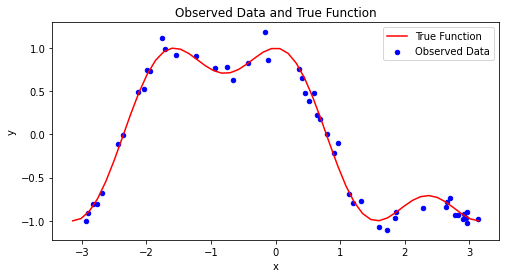

In [14]:
fig = plt.figure(figsize=(8,4))
plt.scatter(xobs, yobs, label='Observed Data', color='blue', s=20)
plt.plot(xfittest, ytrue, label='True Function', color='red')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data and True Function')
plt.savefig("synthetic_figures/original.pdf", format="pdf", bbox_inches="tight")
plt.show()

Best parameters: corrlen=0.5222222222222223, sigma=0.3111111111111111, energy=1.1555555555555557
        Model  Mean Squared Error  Root Mean Squared Error  \
0  exp square            0.001663                 0.040786   
1    rat quad            0.002199                 0.046896   
2     orn uhl            0.012272                 0.110779   

   Mean Absolute Error  R2 Score  
0             0.031702  0.997368  
1             0.037410  0.996521  
2             0.077445  0.980585  


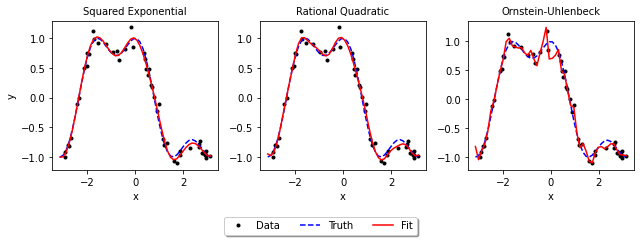

In [15]:
perf_df, fig = fit_gp_gammy(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("synthetic_figures/figure1.pdf", format="pdf", bbox_inches="tight")
print(perf_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.001663                 0.040786   
1                       rat quad            0.002199                 0.046896   
2                        orn uhl            0.012272                 0.110779   
3                         Smooth            0.008998                 0.094856   
4              Smooth + Periodic            0.005502                 0.074175   
5  Smooth + Periodic + Symmetric            0.004850                 0.069644   

   Mean Absolute Error  R2 Score  
0             0.031702  0.997368  
1             0.037410  0.996521  
2             0.077445  0.980585  
3             0.070461  0.985766  
4             0.059213  0.991296  
5             0.057983  0.992327  


<Figure size 648x216 with 0 Axes>

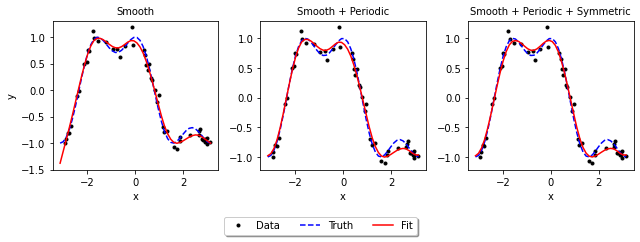

In [16]:
perf_lm, fig = fit_difference_priors(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("synthetic_figures/figure2.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([perf_df, perf_lm], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.001663                 0.040786   
1                       rat quad            0.002199                 0.046896   
2                        orn uhl            0.012272                 0.110779   
3                         Smooth            0.008998                 0.094856   
4              Smooth + Periodic            0.005502                 0.074175   
5  Smooth + Periodic + Symmetric            0.004850                 0.069644   
6              Linear Regression            0.511897                 0.715470   

   Mean Absolute Error  R2 Score  
0             0.031702  0.997368  
1             0.037410  0.996521  
2             0.077445  0.980585  
3             0.070461  0.985766  
4             0.059213  0.991296  
5             0.057983  0.992327  
6             0.615174  0.190164  


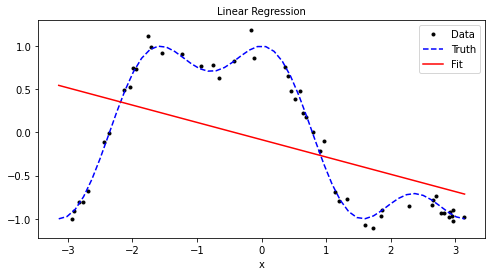

In [17]:
perf_df2, fig2 = fit_linear_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig2.savefig("synthetic_figures/figure3.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_df2], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.001663                 0.040786   
1                       rat quad            0.002199                 0.046896   
2                        orn uhl            0.012272                 0.110779   
3                         Smooth            0.008998                 0.094856   
4              Smooth + Periodic            0.005502                 0.074175   
5  Smooth + Periodic + Symmetric            0.004850                 0.069644   
6              Linear Regression            0.511897                 0.715470   
7                  Random Forest            0.007072                 0.084094   

   Mean Absolute Error  R2 Score  
0             0.031702  0.997368  
1             0.037410  0.996521  
2             0.077445  0.980585  
3             0.070461  0.985766  
4             0.059213  0.991296  
5             0.057983  0.992327  
6             0.615174  0

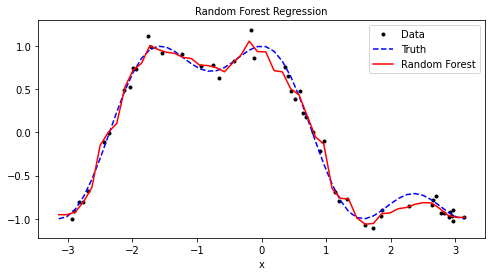

In [18]:
perf_rf, fig3 = fit_rf_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig3.savefig("synthetic_figures/figure4.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_rf], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.001663                 0.040786   
1                       rat quad            0.002199                 0.046896   
2                        orn uhl            0.012272                 0.110779   
3                         Smooth            0.008998                 0.094856   
4              Smooth + Periodic            0.005502                 0.074175   
5  Smooth + Periodic + Symmetric            0.004850                 0.069644   
6              Linear Regression            0.511897                 0.715470   
7                  Random Forest            0.007072                 0.084094   
8                 Frequentist AM            0.012141                 0.110184   

   Mean Absolute Error  R2 Score  
0             0.031702  0.997368  
1             0.037410  0.996521  
2             0.077445  0.980585  
3             0.070461  0.985766  
4             

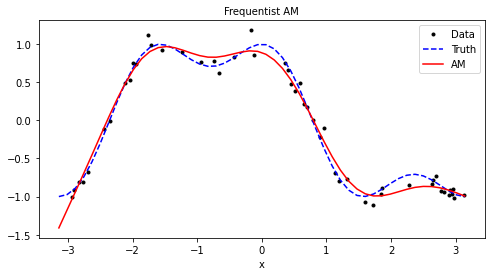

In [19]:
perf4, fig4 = fit_gam_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig4.savefig("synthetic_figures/figure5.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf4], ignore_index=True)
print(combined_df)
plt.show()

In [20]:
result = pd.DataFrame(combined_df)
result = result.round(5)
result.head(10)

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score
0,exp square,0.00166,0.04079,0.03170,0.99737
1,rat quad,0.00220,0.04690,0.03741,0.99652
2,orn uhl,0.01227,0.11078,0.07745,0.98059
3,Smooth,0.00900,0.09486,0.07046,0.98577
4,Smooth + Periodic,0.00550,0.07418,0.05921,0.99130
5,Smooth + Periodic + Symmetric,0.00485,0.06964,0.05798,0.99233
6,Linear Regression,0.51190,0.71547,0.61517,0.19016
7,Random Forest,0.00707,0.08409,0.06562,0.98881
8,Frequentist AM,0.01214,0.11018,0.08609,0.98079
